# 2110443 - Computer Vision (2022/2)
## Lab 5 - Color Processing
In this lab, we will learn to use color feature in different color spaces to extract useful information from images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [1]:
import cv2
import math
import time
import threading
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact,interactive
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output
import IPython.display
%matplotlib inline

## Grayscale Image Thresholding
Thresholding is the simplest method of image segmentation. This non-linear operation converts a grayscale image into a binary image where the two colors (black/white) are assigned to pixels that are below or above the specified threshold. <br>
Lena comes again! Can you adjust both sliders to segment lena's skin?

In [2]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
def grayscaleThresholding(minValue,maxValue):
    thresholdImage = np.logical_and(inputImage > minValue, inputImage < maxValue)
    inputImageCopy = inputImage.copy()
    cv2.rectangle(inputImageCopy,(250,400),(340,500),255,3)
    cropRegion = inputImage[400:500,250:340]
    
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.title("Lena Image")
    plt.imshow(inputImageCopy, cmap='gray')
    
    plt.subplot(132)
    plt.title("Segmentation Mask")
    plt.imshow(thresholdImage, cmap='gray')
    
    plt.subplot(133)
    plt.title("Pixel Value Distribution")
    plt.hist(cropRegion,range=(0,255))
    plt.show()
interact(grayscaleThresholding, minValue=widgets.IntSlider(min=0,max=255,step=1,value=1),maxValue=widgets.IntSlider(min=0,max=255,step=1,value=1));

interactive(children=(IntSlider(value=1, description='minValue', max=255), IntSlider(value=1, description='max…

## Simple Image Segmentation using Color

As you can see from the above sample, only grayscale information is usually not enough to segment "things" from the images. In this section we will apply simple color segmentation on various colorspaces. The following block is code snippet which retrive image from your webcam and apply thresholding on BGR image using defined value.

In [3]:
bMin = 50; bMax = 170
gMin = 70; gMax = 180
rMin = 90; rMax = 220
cameraNo = 0

In [4]:
# You can press "Interupt Kernel Button to stop webcam"
inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            outputVideoFrameBGR = videoFrameBGR.copy()

            # Draw ROI
            cv2.rectangle(outputVideoFrameBGR,(100,100),(200,200),(0,255,0),3)
            # Cropped Region
            croppedRegion = videoFrameBGR[100:200,100:200,:]
            
           
            
            mask = cv2.inRange(videoFrameBGR,(bMin,gMin,rMin),(bMax,gMax,rMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            
            ## Draw Min/Max pixel value in BGR order on image
            cv2.putText(outputVideoFrameBGR,str(np.min(croppedRegion[:,:,0]))+'/'+str(np.min(croppedRegion[:,:,1]))+'/'+str(np.min(croppedRegion[:,:,2])),(20,20),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255))
            cv2.putText(outputVideoFrameBGR,str(np.max(croppedRegion[:,:,0]))+'/'+str(np.max(croppedRegion[:,:,1]))+'/'+str(np.max(croppedRegion[:,:,2])),(20,50),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,0,255))
            
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            # Encode image as jpg numpy array
            _, buf = cv2.imencode(".jpg", outputVideoFrameBGR)
            # Draw result
            IPython.display.display(IPython.display.Image(data=buf))
        
            clear_output(wait=True) 
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()

Stream stopped


Since the slider widget does not support for-loop webcam retrival method that we use, we may use build-in OpenCV GUI library to create a color range slider by using the following code. (The window name <b>"Color Segmentation"</b> will popup!)

In [4]:
def sliderCallback(x):
    pass
# Create a OpenCV Window
windowName = 'Color Segmentation'
cv2.namedWindow(windowName)
cv2.createTrackbar('bMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('gMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('rMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('bMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('gMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('rMax',windowName,0,255,sliderCallback)

inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            
            bMin = cv2.getTrackbarPos('bMin',windowName)
            gMin = cv2.getTrackbarPos('gMin',windowName)
            rMin = cv2.getTrackbarPos('rMin',windowName)
            
            bMax = cv2.getTrackbarPos('bMax',windowName)
            gMax = cv2.getTrackbarPos('gMax',windowName)
            rMax = cv2.getTrackbarPos('rMax',windowName)
            
            mask = cv2.inRange(videoFrameBGR,(bMin,gMin,rMin),(bMax,gMax,rMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            outputVideoFrameBGR = videoFrameBGR.copy()
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            cv2.imshow(windowName,outputVideoFrameBGR)
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

Stream stopped


OpenCV supports many well-known colorspaces. You can apply the colorspace transformation by using <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab">cv2.cvtColor</a> and see the list of suppoted transformation flags <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0">here</a>. Try tp apply color segmention on any object in other colorspace <b>(NOT BGR!!)</b> by fill the following block.

In [18]:
### FILL HERE ###
hMin = 50; hMax = 170
lMin = 70; lMax = 180
sMin = 90; sMax = 220
cameraNo = 0

def sliderCallback(x):
    pass
# Create a OpenCV Window
windowName = 'Color Segmentation'
cv2.namedWindow(windowName)
cv2.createTrackbar('hMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('lMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('sMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('hMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('lMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('sMax',windowName,0,255,sliderCallback)

inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            
            hMin = cv2.getTrackbarPos('hMin',windowName)
            lMin = cv2.getTrackbarPos('lMin',windowName)
            sMin = cv2.getTrackbarPos('sMin',windowName)
            
            hMax = cv2.getTrackbarPos('hMax',windowName)
            lMax = cv2.getTrackbarPos('lMax',windowName)
            sMax = cv2.getTrackbarPos('sMax',windowName)
            
            mask = cv2.inRange(cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2HLS), (hMin,lMin,sMin), (hMax,lMax,sMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            outputVideoFrameBGR = videoFrameBGR.copy()
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            cv2.imshow(windowName,outputVideoFrameBGR)
            cv2.imshow(windowName,outputVideoFrameBGR)
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

## Morphological Transformations

The field of mathematical morphology contributes a wide range of operators to image processing, all based around a simple mathematical concepts from set theory. Morphological transformations are the operations based on the image shape employed on binay images. This operation needs needs two inputs, one is binary image, second one is called <b>structuring element or kernel</b> which decides the operation output. You can design the kernel to suit your application needs. Two basic morphological operators are Erosion and Dilation

The following mask image is segmented by using color information. You can see that there are some hand's pixels which are not connect into a perfect hand shape. We can correct these by using the basic morphological operaters.

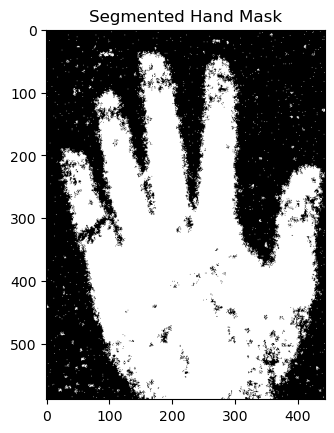

In [8]:
handMask = cv2.imread('assets/Lab5-SegmentedHand.png', cv2.IMREAD_GRAYSCALE)
plt.title('Segmented Hand Mask')
plt.imshow(handMask,cmap='gray')
plt.show()

In [9]:
def openAndCloseMorph(kernelSize,kernelShape, morphType):
    kernel = cv2.getStructuringElement(kernelShape,(kernelSize,kernelSize))

    outputImage = handMask.copy()
    
    if morphType == 'erode':
        outputImage = cv2.erode(outputImage,kernel,iterations = 1)
    else:
        outputImage = cv2.dilate(outputImage,kernel,iterations = 1)

    plt.figure(figsize=(5,5))
    plt.imshow(outputImage, cmap='gray')
    plt.show()
    
    print('Morphology Kernel Shape:')
    display(kernel)
    
interact(openAndCloseMorph, kernelSize=widgets.IntSlider(min=1,max=11,step=1,value=1), 
         kernelShape=widgets.Dropdown(
                        options=[cv2.MORPH_RECT,cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS],
                        value=cv2.MORPH_RECT,
                        description='kernelShape:',
                        disabled=False),
        morphType=widgets.Dropdown(
                        options=['erode','dilate'],
                        value='erode',
                        description='Morph Type:',
                        disabled=False)
);

interactive(children=(IntSlider(value=1, description='kernelSize', max=11, min=1), Dropdown(description='kerne…

This <a href="https://docs.opencv.org/3.4.2/d9/d61/tutorial_py_morphological_ops.html">page</a> shows a good morphological operation exmple, try to write an interactive visualization like the above sample on <b>Opening and Closing</b> operations. See the output results by yourself.

In [10]:
### FILL HERE ###
def openAndCloseMorph(kernelSize,kernelShape, morphType):
    kernelShapes = {'MORPH_RECT': cv2.MORPH_RECT,
                    'MORPH_ELLIPSE': cv2.MORPH_ELLIPSE,
                    'MORPH_CROSS': cv2.MORPH_CROSS}
    kernelShape = kernelShapes[kernelShape]
    kernel = cv2.getStructuringElement(kernelShape,(kernelSize,kernelSize))
    
    outputImage = handMask.copy()
    
    if morphType == 'erode':
        outputImage = cv2.erode(outputImage, kernel, iterations = 1)
    elif morphType == 'dilate':
        outputImage = cv2.dilate(outputImage, kernel, iterations = 1)
    elif morphType == 'opening':
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_OPEN, kernel)
    else:
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_CLOSE, kernel)

    plt.figure(figsize=(5,5))
    plt.imshow(outputImage, cmap='gray')
    plt.show()
    
    print('Morphology Kernel Shape:')
    display(kernel)
    
interact(openAndCloseMorph, kernelSize=widgets.IntSlider(min=1,max=11,step=1,value=1), 
         kernelShape=widgets.Dropdown(
                        options=['MORPH_RECT','MORPH_ELLIPSE','MORPH_CROSS'],
                        value='MORPH_RECT',
                        description='kernelShape:',
                        disabled=False),
        morphType=widgets.Dropdown(
                        options=['erode','dilate','opening','closing'],
                        value='erode',
                        description='Morph Type:',
                        disabled=False)
);
#################

interactive(children=(IntSlider(value=1, description='kernelSize', max=11, min=1), Dropdown(description='kerne…

## Assignment 1 - Color Based Face Detector <br>

<img src="assets/Lab5-funnyface.gif"/>
By using the knowledge from lecture 1-4, you should be able to write your own simple color based face detector. Use the above code snippets to help you write it. The output should be a code which retrive video feed from <b>your webcam</b> and draw bounding boxes around detected faces. Write the detection results into video file and hand in with this notebook. There should be <b>two video sequences</b>, in good lighting and other lighting condition. The output video should show robustness of your designed alogorithm. (Optional) You will get extra points if you can use <b>same parameters</b> for both sequences.

<b>Basic Guidance:<b>
1. Create a "face color segmentation mask" using your choice colorspace.
2. Filter out the outlier pixel!
3. Categorize each connected component into group by using cv2.findContours (from Lab 3)
4. Find the bounding box which can enclose those connect components by <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#gacb413ddce8e48ff3ca61ed7cf626a366">cv2.boundingRect</a>

<b>Hints:</b>
- From today lecture, how do to discard noise/fill small hole from color segmentation mask output?
- Since this is a color-based problem, you can use old knowledge from lecture 1-3 to improve segmentation result by apply <b>?</b> on input image
- You can use some specific threshold based on shape properties or simple morphological operations to keep only potential contours
- To achieve a better result for both lighting conditions, you may need to apply some data analysis on the <b>region of interest</b> by plotting each channel value and see their data distributions.
- Internet is your friend. You can search for relavent research papers and use their algorithms/implementations, but you must <b>give proper credits</b> by citing them in this notebook. 

In [7]:
### Describe how your algorithm work here (Thai or English). You can provide any visualization if you want.
'''
1. .. create face color segmentation mask using yCrCb and HSV color space ( cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb/cv2.COLOR_BGR2HSV) ),
        you can find min-max of each axis for classify a pixel is skin/face or not using color histogram
2. .. reduce noise of mask
3. .. find contour of image ( cv2.findContours ), if area of contour is less than threshold then ignore it (it is noise)
4. .. draw bounding rectangle of face ( cv2.boundingRect )
'''

'\n1. .. find color histogram of skin/face image\n2. .. create face color segmentation mask using yCrCb color space ( cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) )\n2. .. reduce noise of mask\n3. .. find contour of image ( cv2.findContours )\n4. .. draw bounding rectangle of face ( cv2.boundingRect )\n'

In [3]:
''' 0. .. color histogram '''
inputImage = cv2.cvtColor(cv2.imread("assets/lena_std.tif"), cv2.COLOR_BGR2RGB)
def cropImage(x, y, w, h):
    # thresholdImage = np.logical_and(inputImage > minValue, inputImage < maxValue)
    inputImageRBG = inputImage.copy()
    x1 = x; x2 = min(x+w, inputImageRBG.shape[0])
    y1 = y; y2 = min(y+h, inputImageRBG.shape[1])
    cropRegion = inputImageRBG[y1:y2,x1:x2].copy()
    cv2.rectangle(inputImageRBG,
                  (x1, y1),
                  (x2, y2),
                  255,3)
    
    red = cropRegion[:,:,0].astype('uint8')
    green = cropRegion[:,:,1].astype('uint8')
    blue = cropRegion[:,:,2].astype('uint8')
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.title("Lena Image")
    plt.imshow(inputImageRBG)
    
    plt.subplot(122)
    plt.title("Crop Region")
    plt.imshow(cropRegion)
    
    
    inputImageYCrCb = cv2.cvtColor(inputImageRBG, cv2.COLOR_BGR2YCrCb)
    cropRegionYCrCb = inputImageYCrCb[y1:y2,x1:x2].copy()
    
    plt.show()

    
interact(cropImage,
         x=widgets.IntSlider(min=0,max=inputImage.shape[1]-2,step=1,value=240),
         y=widgets.IntSlider(min=0,max=inputImage.shape[0]-2,step=1,value=410),
         w=widgets.IntSlider(min=1,max=inputImage.shape[1]-1,step=1,value=100),
         h=widgets.IntSlider(min=1,max=inputImage.shape[0]-1,step=1,value=100));

interactive(children=(IntSlider(value=240, description='x', max=510), IntSlider(value=410, description='y', ma…

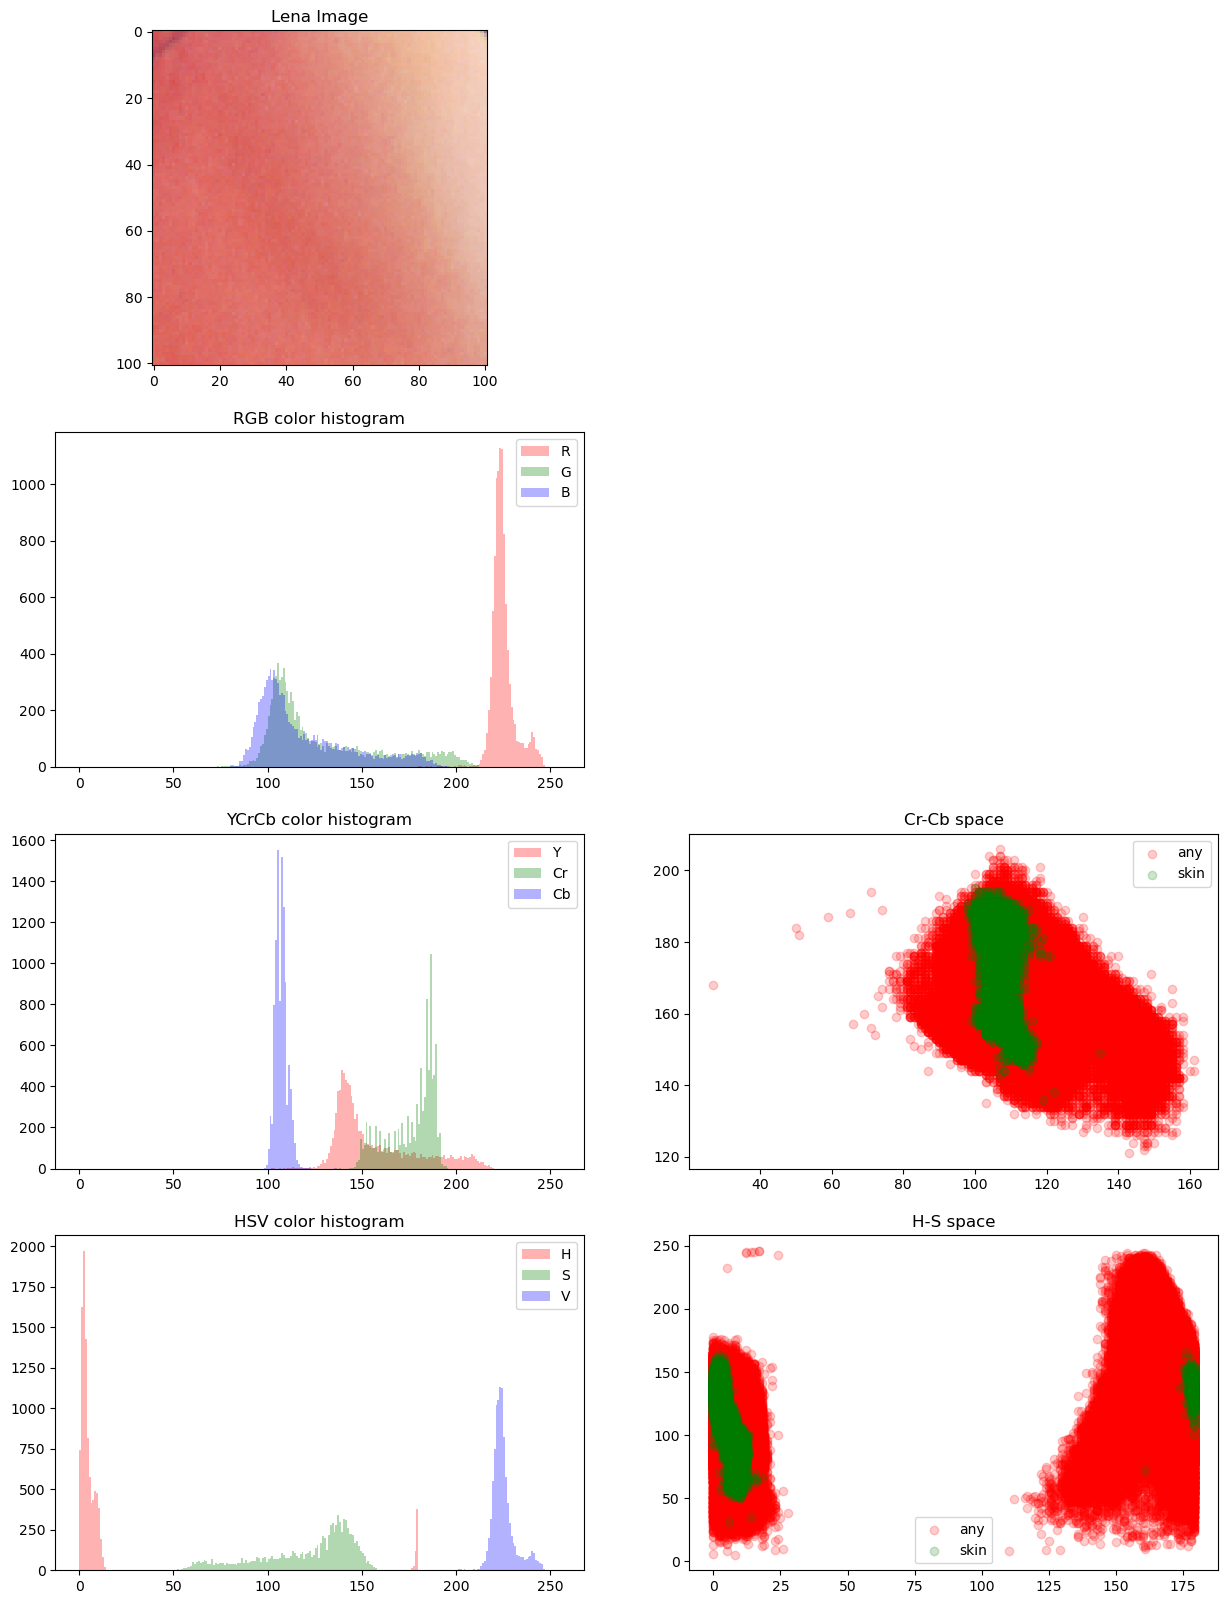

In [5]:
''' 0. .. color histogram '''
inputImageRGB = cv2.cvtColor(cv2.imread("assets/lena_std.tif"), cv2.COLOR_BGR2RGB)
R = inputImage[:,:,0].reshape(-1); G = inputImage[:,:,1].reshape(-1); B = inputImage[:,:,2].reshape(-1)

inputImageYCrCb = cv2.cvtColor(inputImageRGB, cv2.COLOR_RGB2YCrCb)
Y = inputImageYCrCb[:,:,0].reshape(-1); Cr = inputImageYCrCb[:,:,1].reshape(-1); Cb = inputImageYCrCb[:,:,2].reshape(-1)

inputImageHSV = cv2.cvtColor(inputImageRGB, cv2.COLOR_RGB2HSV)
H = inputImageHSV[:,:,0].reshape(-1); S = inputImageHSV[:,:,1].reshape(-1); V = inputImageHSV[:,:,2].reshape(-1)

cropImageRGB = inputImage[410:410+100+1, 247:247+100+1].copy()
r = cropImageRGB[:,:,0].reshape(-1); g = cropImageRGB[:,:,1].reshape(-1); b = cropImageRGB[:,:,2].reshape(-1)

cropImageYCrCb = cv2.cvtColor(cropImageRGB, cv2.COLOR_RGB2YCrCb)
y = cropImageYCrCb[:,:,0].reshape(-1); cr = cropImageYCrCb[:,:,1].reshape(-1); cb = cropImageYCrCb[:,:,2].reshape(-1)

cropImageHSV = cv2.cvtColor(cropImageRGB, cv2.COLOR_RGB2HSV)
h = cropImageHSV[:,:,0].reshape(-1); s = cropImageHSV[:,:,1].reshape(-1); v = cropImageHSV[:,:,2].reshape(-1)

plt.figure(figsize=(15, 20))
plt.subplot(421); plt.imshow(cropImageRGB); plt.title("Lena Image")

plt.subplot(423)
plt.hist(r, bins=range(0,256), color='r', alpha=0.3, label='R'); plt.hist(g, bins=range(0,256), color='g', alpha=0.3, label='G'); plt.hist(b, bins=range(0,256), color='b', alpha=0.3, label='B')
plt.title("RGB color histogram"); plt.legend()

plt.subplot(425)
plt.hist(y, bins=range(0,256), color='r', alpha=0.3, label='Y'); plt.hist(cr, bins=range(0,256), color='g', alpha=0.3, label='Cr'); plt.hist(cb, bins=range(0,256), color='b', alpha=0.3, label='Cb')
plt.title("YCrCb color histogram"); plt.legend()

plt.subplot(426)
plt.scatter(Cb, Cr, color='r', alpha=0.2, label='any'); plt.scatter(cb, cr, color='g', alpha=0.2, label='skin'); plt.title("Cr-Cb space"); plt.legend()

plt.subplot(427)
plt.hist(h, bins=range(0,256), color='r', alpha=0.3, label='H'); plt.hist(s, bins=range(0,256), color='g', alpha=0.3, label='S'); plt.hist(v, bins=range(0,256), color='b', alpha=0.3, label='V')
plt.title("HSV color histogram"); plt.legend()

plt.subplot(428)
plt.scatter(H, S, color='r', alpha=0.2, label='any'); plt.scatter(h, s, color='g', alpha=0.2, label='skin')
plt.title("H-S space"); plt.legend()

plt.show()

In [3]:
''' YCrCb space '''
yMin = 70; yMax = 120
crMin = 130; crMax = 180
cbMin = 75; cbMax = 135
cameraNo = 0

def sliderCallback(x):
    pass
# Create a OpenCV Window
windowName = 'Color Segmentation'
cv2.namedWindow(windowName)
cv2.createTrackbar('yMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('crMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('cbMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('yMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('crMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('cbMax',windowName,0,255,sliderCallback)

inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            
            yMin = cv2.getTrackbarPos('yMin',windowName)
            crMin = cv2.getTrackbarPos('crMin',windowName)
            cbMin = cv2.getTrackbarPos('cbMin',windowName)
            
            yMax = cv2.getTrackbarPos('yMax',windowName)
            crMax = cv2.getTrackbarPos('crMax',windowName)
            cbMax = cv2.getTrackbarPos('cbMax',windowName)
            
            mask = cv2.inRange(cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2YCrCb), (yMin,crMin,cbMin), (yMax,crMax,cbMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            outputVideoFrameBGR = videoFrameBGR.copy()
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            cv2.imshow(windowName,outputVideoFrameBGR)
            cv2.imshow(windowName,outputVideoFrameBGR)
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

In [6]:
''' HSV space '''
hMin = 0; hMax = 125
sMin = 25; sMax = 255
vMin = 65; vMax = 255
cameraNo = 0

def sliderCallback(x):
    pass
# Create a OpenCV Window
windowName = 'Color Segmentation'
cv2.namedWindow(windowName)
cv2.createTrackbar('hMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('sMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('vMin',windowName,0,255,sliderCallback)
cv2.createTrackbar('hMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('sMax',windowName,0,255,sliderCallback)
cv2.createTrackbar('vMax',windowName,0,255,sliderCallback)

inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            
            hMin = cv2.getTrackbarPos('hMin',windowName)
            sMin = cv2.getTrackbarPos('sMin',windowName)
            vMin = cv2.getTrackbarPos('vMin',windowName)
            
            hMax = cv2.getTrackbarPos('hMax',windowName)
            sMax = cv2.getTrackbarPos('sMax',windowName)
            vMax = cv2.getTrackbarPos('vMax',windowName)
            
            mask = cv2.inRange(cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2HSV), (hMin,sMin,vMin), (hMax,sMax,vMax))[:,:,np.newaxis]
            mask = np.repeat(mask,3,axis=2)
            outputVideoFrameBGR = videoFrameBGR.copy()
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,mask))
            
            cv2.imshow(windowName,outputVideoFrameBGR)
            cv2.imshow(windowName,outputVideoFrameBGR)
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

In [21]:
### FILL HERE ###

## Change mask using yCrCb color space
maskThresholdYCrCbMin = (70, 130, 75)
maskThresholdYCrCbMax = (120, 180, 135)

## Change mask using HSV color space
maskThresholdHSVMin = (0, 25, 65)
maskThresholdHSVMax = (125, 255, 255)

# kernels
open_kernel = np.ones((5,5),np.uint8)
close_kernel = np.ones((7,7),np.uint8)
dilation_kernel = np.ones((5, 5), np.uint8)

cameraNo = 0

def sliderCallback(x):
    pass
# Create a OpenCV Window
windowName = 'Face Detection'
cv2.namedWindow(windowName)

inputStream = cv2.VideoCapture(cameraNo) 
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            
            ''' 1. .. create face color segmentation mask using yCrCb and HSV color space '''
            maskYCrCb = cv2.inRange(cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2YCrCb),
                   maskThresholdYCrCbMin,
                   maskThresholdYCrCbMax)[:,:,np.newaxis]

            maskHSV = cv2.inRange(cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2HSV),
                               maskThresholdHSVMin,
                               maskThresholdHSVMax)[:,:,np.newaxis]

            maskMerge = cv2.bitwise_and(maskYCrCb, maskHSV)

            ''' 2. .. reduce noise of mask '''
            maskMerge = cv2.morphologyEx(maskMerge, cv2.MORPH_CLOSE, close_kernel)
            maskMerge = cv2.morphologyEx(maskMerge, cv2.MORPH_OPEN, open_kernel)
            maskMerge = cv2.dilate(maskMerge, dilation_kernel, iterations= 1)

            ''' 3. .. find contour of image ( cv2.findContours ), if area of contour is less than threshold then ignore it (it is noise) '''
            contours, _ = cv2.findContours(maskMerge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            contourImage = cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2RGB).copy()
            THRESHOLD_AREA = 12000
            for contourIdx in range(len(contours)):
                if cv2.contourArea(contours[contourIdx]) > THRESHOLD_AREA:
                    color = (0,255,0)
                    x, y, w, h = cv2.boundingRect(contours[contourIdx])
                    
                    ''' 4. .. draw bounding rectangle of face ( cv2.boundingRect ) '''
                    cv2.rectangle(contourImage,(x,y),(x+w,y+h-(1*h//4)),color,3)
            contourImage = cv2.cvtColor(contourImage, cv2.COLOR_BGR2RGB)

            outputVideoFrameBGR = contourImage.copy()
            cv2.imshow(windowName, outputVideoFrameBGR)
            
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

## Assignment 2 - Invisibility Cloak 
By using the knowledge from lecture 1-4, you should be able to mimic a invisibility cloak from famous Harry Potter franchise by using color segmentation<br>
<img src="assets/Lab5-invisibilitycloak.gif"><br>
<b>Basic Guidance:<b>
1. Create a "invisibility cloak color segmentation mask" using your choice colorspace.
2. Filter out the outlier pixel using some specify (you can think by your own!) criteria.
3. Replace each invisible cloak area with store static background image.
4. Make a short video clip to demonstrate/show your algorithm

<b>Hints:</b>
- From today lecture, how do to discard noise/fill small hole from color segmentation mask output?
- Since this is a color-based problem, you can use old knowledge from lecture 1-3 to improve segmentation result by apply <b>?</b> on input image
- Internet is your friend. You can search for relavent research papers and use their algorithm, but you must <b>give proper credits</b> by citing them in this notebook. 

In [4]:
### Algorithm
'''
1. .. get static background image
2. .. convert input frame into HSV color space and find mask
3. .. remove noise from mask (use Morphological Transformations) and get inverse mask
4. .. apply the mask to the static background image and apply the inverse of mask to the input frame
5. .. combine two masked image together
'''

'\n1. .. get static background image\n2. .. convert input frame into HSV color space and find mask\n3. .. remove noise from mask (use Morphological Transformations) and get inverse mask\n4. .. apply the mask to the static background image and apply the inverse of mask to the input frame\n5. .. combine two masked image together\n'

In [12]:
''' 0. .. find green threshold in HSV color space '''
def HSVcolor(h,s,v):
    img = np.array([[[h,s,v]]], dtype='uint8')
    img = np.repeat(img, 64, axis=0)
    img = np.repeat(img, 64, axis=1)
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap='gray')
    plt.show()
    
interact(HSVcolor,
         h=widgets.IntSlider(min=0,max=180,step=1,value=50),
         s=widgets.IntSlider(min=0,max=255,step=1,value=255),
         v=widgets.IntSlider(min=0,max=255,step=1,value=255),
        );

interactive(children=(IntSlider(value=50, description='h', max=180), IntSlider(value=255, description='s', max…

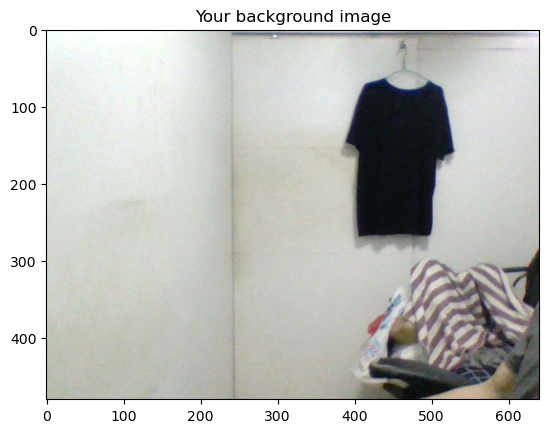

In [19]:
''' 1. .. get static background image '''
cam = cv2.VideoCapture(0)
cv2.namedWindow("CAPTURE BACKGROUND IMAGE")
ret, frame = cam.read()
static_background = frame.copy()
plt.imshow(cv2.cvtColor(static_background, cv2.COLOR_BGR2RGB))
plt.title("Your background image")
cam.release()
cv2.destroyAllWindows()

In [20]:
open_kernel = np.ones((5,5),np.uint8)
close_kernel = np.ones((7,7),np.uint8)
dilation_kernel = np.ones((5, 5), np.uint8)
cameraNo = 0
def sliderCallback(x):
    pass
windowName = 'Invisible Cloak'
cv2.namedWindow(windowName)

windowWidth = 640
windowHeight = 480

static_background = cv2.resize(static_background, (windowWidth, windowHeight))
thresholdMin = np.array([50, 70, 50])     
thresholdMax = np.array([90, 255, 255])

inputStream = cv2.VideoCapture(cameraNo)
try:
    while True:
        _, videoFrameBGR = inputStream.read()
        if videoFrameBGR is not None:
            
            ''' 2. .. convert input frame into HSV color space and find mask '''
            
            # print('static_bg', static_background.shape)
            # print('curr_bg', videoFrameBGR.shape)
            mask = cv2.inRange(cv2.cvtColor(videoFrameBGR, cv2.COLOR_BGR2HSV), thresholdMin, thresholdMax)
            
            ''' 3. .. remove noise from mask (use Morphological Transformations) and get inverse mask '''
            
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, close_kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, open_kernel)
            mask = cv2.dilate(mask, dilation_kernel, iterations= 1)
            
            inverse_mask = cv2.bitwise_not(mask) 

            # print('mask', mask.shape)
            # print('inv_mask', inverse_mask.shape)
            
            ''' 4. .. apply the mask to the static background image and apply the inverse of mask to the input frame '''
            
            cloak = cv2.bitwise_and(static_background, static_background, mask=mask)
            current_background = cv2.bitwise_and(videoFrameBGR, videoFrameBGR, mask=inverse_mask)
            
            # print('cloak', cloak.shape)
            # print('curr_bg', current_background.shape)
            
            ''' 5. .. combine two masked image together '''
            combined = cv2.add(cloak, current_background)
            
            # print('combine', combined.shape)
            
            
            outputVideoFrameBGR = videoFrameBGR.copy()
            outputVideoFrameBGR = np.hstack((outputVideoFrameBGR,combined))
            
            cv2.imshow(windowName,outputVideoFrameBGR)
            cv2.imshow(windowName,outputVideoFrameBGR)
            if cv2.waitKey(1) == ord('q'):
                cv2.destroyAllWindows()
                break
        else:
            print("Cannot Open Webcam, hw problqem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()
cv2.destroyAllWindows()

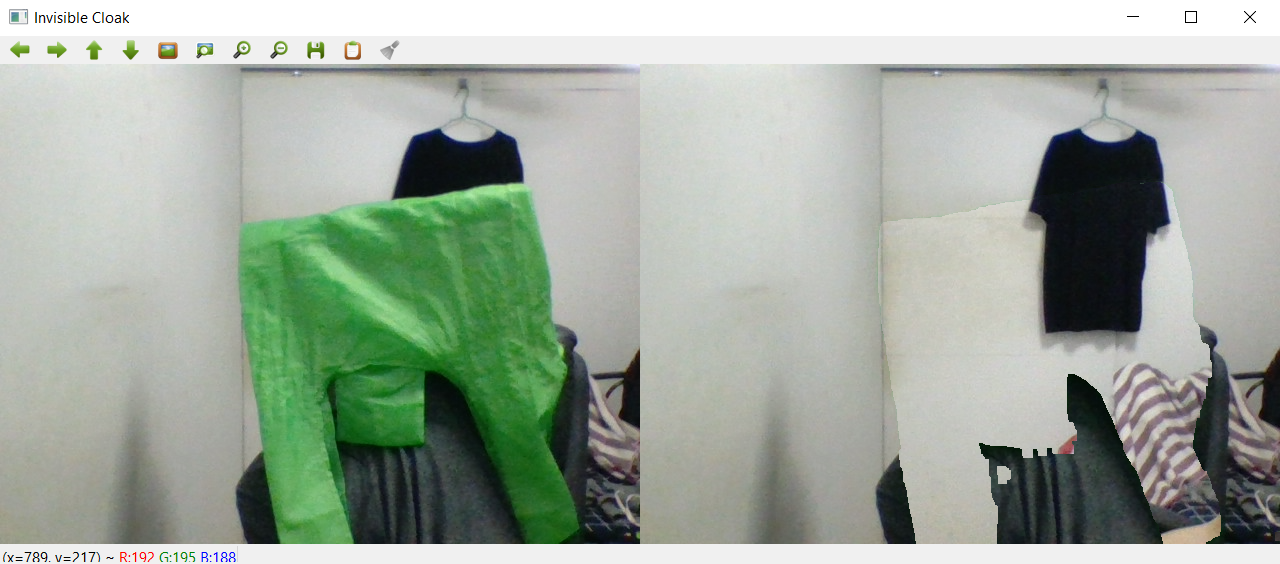